# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "YoungsEtAl2003"
sys.path.append(str(MODEL_DIR))

import run_displacement_profile

# View the docstrings

In [3]:
help(run_displacement_profile)

Help on module run_displacement_profile:

NAME
    run_displacement_profile

DESCRIPTION
    This file runs the YEA03 principal fault displacement model to create a slip profile.
    - Any number of scenarios are allowed (e.g., user can enter multiple magnitudes).
    - The results are returned in a pandas DataFrame.
    - Results with full aleatory variability and with location-only aleatory variability are always returned.
    - The results with full aleatory variability are computed by convolving distributions for normalized
    displacement (based on magnitude) and normalization ratio (based on location) using the Monte Carlo sampling
    method described in Moss and Ross (2011).
    - Only the principal fault displacement models are implemented herein currently.
    - Only the D/AD relationship is implemented because the D/MD results on Figures 6 and 7a in Youngs
    et al. (2003) cannot be reproduced using the formulations and coefficients in the appendix.
    - The AD value used

# An important note: Capturing aleatory variabilty in models that predict normalized displacement

Please see the discussion in Section 4 of the Notebook called "YEA03 Run Displacement Model.iphnb" for a discussion on how aleatory variability is treated. That discussion is very important for understanding the results table.

# Run profile

## Single scenarios

A single scenario is defined as a magnitude/percentile/submodel. Here is an example (note all parameters must be passed as keyword arguments).

In [4]:
mag, perc, model = 6.8, 0.84, "d_ad"

results = run_displacement_profile.run_profile(
    magnitude=mag, percentile=perc, submodel=model
)

results.head()

,magnitude,location,style,percentile,model_name,mu,sigma,alpha,beta,xd,d_xd,displ_without_aleatory,displ_with_aleatory
0,6.8,0.00,normal,0.84,d_ad,-0.108,0.36,0.824482,1.009041,0.77983,1.565316,1.220680,1.565637
1,6.8,0.05,normal,0.84,d_ad,-0.108,0.36,0.894402,0.985309,0.77983,1.640387,1.279223,1.654255
2,6.8,0.10,normal,0.84,d_ad,-0.108,0.36,0.970251,0.962135,0.77983,1.718130,1.339850,1.745539
3,6.8,0.15,normal,0.84,d_ad,-0.108,0.36,1.052533,0.939507,0.77983,1.798737,1.402710,1.851168
4,6.8,0.20,normal,0.84,d_ad,-0.108,0.36,1.141793,0.917411,0.77983,1.882412,1.467962,1.960837


The default location spacing is 0.05, but it can be changed with `location_step=0.01`, for example:

In [5]:
results = run_displacement_profile.run_profile(
    magnitude=mag, percentile=perc, submodel=model, location_step=0.01
)

results.head()

,magnitude,location,style,percentile,model_name,mu,sigma,alpha,beta,xd,d_xd,displ_without_aleatory,displ_with_aleatory
0,6.8,0.00,normal,0.84,d_ad,-0.108,0.36,0.824482,1.009041,0.77983,1.565316,1.220680,1.565637
1,6.8,0.01,normal,0.84,d_ad,-0.108,0.36,0.838014,1.004249,0.77983,1.580125,1.232229,1.579064
2,6.8,0.02,normal,0.84,d_ad,-0.108,0.36,0.851769,0.999480,0.77983,1.595035,1.243857,1.587295
3,6.8,0.03,normal,0.84,d_ad,-0.108,0.36,0.865749,0.994734,0.77983,1.610048,1.255564,1.612466
4,6.8,0.04,normal,0.84,d_ad,-0.108,0.36,0.879959,0.990010,0.77983,1.625165,1.267353,1.629450


And the profile can be plotted:

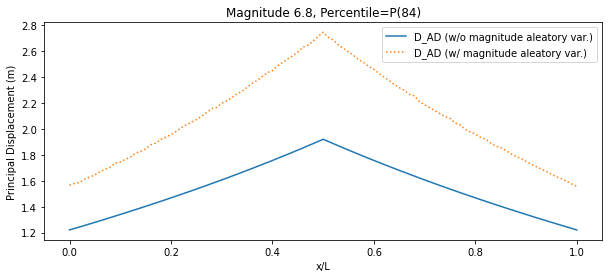

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

label = f"{model.upper()} (w/o magnitude aleatory var.)"
ax.plot(results["location"], results["displ_without_aleatory"], label=label)

label = f"{model.upper()} (w/ magnitude aleatory var.)"
ax.plot(results["location"], results["displ_with_aleatory"], ls=":", label=label)

ptile = "Mean" if perc == -1 else f"P({int(perc*100)})"
title = f"Magnitude {mag}, Percentile={ptile}"
ax.set(xlabel="x/L", ylabel="Principal Displacement (m)", title=title)
ax.legend(loc="best");

This model should only be used for normal faulting. That is the default style. A `UserWarning` will be issued and the user input will be over-ridden in the output table if another style is entered, such as `style="strike-slip"`:

In [7]:
results = run_displacement_profile.run_profile(
    magnitude=mag, percentile=perc, submodel=model, style="strike-slip"
)

results.head()

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\YoungsEtAl2003\run_displacement_model.py:468: UserWarning: This model is only recommended for normal faulting, but 'strike-slip' was entered.User input will be over-ridden.
  warnings.warn(


,magnitude,location,style,percentile,model_name,mu,sigma,alpha,beta,xd,d_xd,displ_without_aleatory,displ_with_aleatory
0,6.8,0.00,normal,0.84,d_ad,-0.108,0.36,0.824482,1.009041,0.77983,1.565316,1.220680,1.565637
1,6.8,0.05,normal,0.84,d_ad,-0.108,0.36,0.894402,0.985309,0.77983,1.640387,1.279223,1.654255
2,6.8,0.10,normal,0.84,d_ad,-0.108,0.36,0.970251,0.962135,0.77983,1.718130,1.339850,1.745539
3,6.8,0.15,normal,0.84,d_ad,-0.108,0.36,1.052533,0.939507,0.77983,1.798737,1.402710,1.851168
4,6.8,0.20,normal,0.84,d_ad,-0.108,0.36,1.141793,0.917411,0.77983,1.882412,1.467962,1.960837


Youngs et al. (2003) model provides three alternative submodels: one is based on normalized displacement $D/AD$ and the other two are on $D/MD$. 

The results for the $D/MD$ models on Figures 6 and 7a in Youngs et al. (2003) cannot be reproduced using the formulations and coefficient provided in their appendix; therefore, only the $D/AD$ model is implemented herein and that is the default for `submodel`. A `UserWarning` will be issued and the user input will be over-ridden in the output table if another `submodel` is entered:

In [8]:
results = run_displacement_profile.run_profile(
    magnitude=mag, percentile=perc, submodel="d_md"
)

results.head()

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\YoungsEtAl2003\run_displacement_model.py:477: UserWarning: Only the D/AD relationship is implemented because the D/MD results on Figures 6 and 7a in Youngs et al. (2003) cannot be reproduced using the formulations and coefficients in the appendix.User input 'd_md' will be over-ridden.
  warnings.warn(


,magnitude,location,style,percentile,model_name,mu,sigma,alpha,beta,xd,d_xd,displ_without_aleatory,displ_with_aleatory
0,6.8,0.00,normal,0.84,d_ad,-0.108,0.36,0.824482,1.009041,0.77983,1.565316,1.220680,1.565637
1,6.8,0.05,normal,0.84,d_ad,-0.108,0.36,0.894402,0.985309,0.77983,1.640387,1.279223,1.654255
2,6.8,0.10,normal,0.84,d_ad,-0.108,0.36,0.970251,0.962135,0.77983,1.718130,1.339850,1.745539
3,6.8,0.15,normal,0.84,d_ad,-0.108,0.36,1.052533,0.939507,0.77983,1.798737,1.402710,1.851168
4,6.8,0.20,normal,0.84,d_ad,-0.108,0.36,1.141793,0.917411,0.77983,1.882412,1.467962,1.960837


In [9]:
del mag, perc, model

## Multiple scenarios

Multiple magnitude/percentile/submodel scenarios can be run. All combinations of magnitudes, percentiles, and submodels are run. Here is an example.

In [10]:
mag, perc, model = 6.75, [0.05, 0.15, 0.5, 0.85, 0.95], "D_AD"

results = run_displacement_profile.run_profile(
    magnitude=mag, percentile=perc, submodel=model
)

And we can plot the different scenarios:

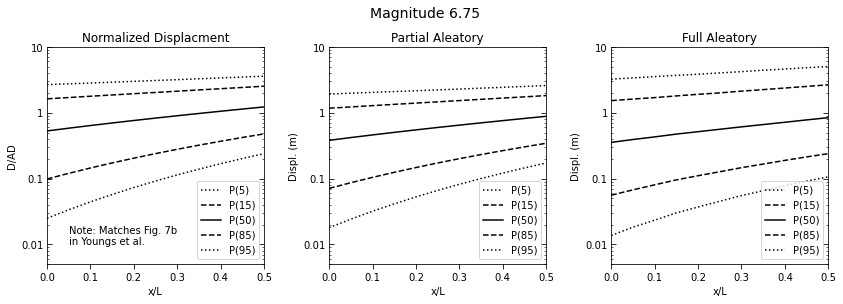

In [11]:
lines = {0.05: ":", 0.95: ":", 0.15: "--", 0.85: "--", 0.5: "-"}

fig, axs = plt.subplots(1, 3, figsize=(14, 4), sharex=True)

for p, group in results.groupby(["percentile"]):
    group = group.sort_values(by="location")
    ptile = "Mean" if p == -1 else f"P({int(p*100)})"
    axs[0].semilogy(group["location"], group["d_xd"], c="k", ls=lines[p], label=ptile)
    axs[1].semilogy(
        group["location"],
        group["displ_without_aleatory"],
        c="k",
        ls=lines[p],
        label=ptile,
    )
    axs[2].semilogy(
        group["location"], group["displ_with_aleatory"], c="k", ls=lines[p], label=ptile
    )

for _ax in axs:
    _ax.set(xlabel="x/L", xlim=[0, 0.5], ylim=[0.005, 10])
    _ax.legend(loc="lower right")
    _ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
    _ax.tick_params(
        axis="y", which="both", right=True, labelright=False, direction="in"
    )
    _ax.tick_params(axis='both', which='major', length=5)

axs[0].set(ylabel="D/AD", title="Normalized Displacment")
axs[1].set(ylabel="Displ. (m)", title="Partial Aleatory")
axs[2].set(ylabel="Displ. (m)", title="Full Aleatory")

axs[0].text(0.05, 0.01, "Note: Matches Fig. 7b\nin Youngs et al.")

fig.subplots_adjust(hspace=0.2, wspace=0.3)

fig.suptitle(f"Magnitude {mag}", y=1.02, fontsize=14)
plt.savefig("scratch-yea03 profiles.png", bbox_inches="tight")